In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from math import *

{'1 1': 1024}


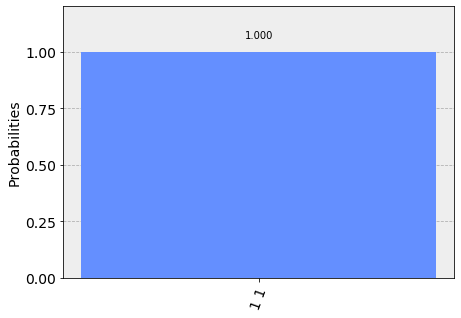

In [3]:
q = QuantumRegister(3)
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
qc = QuantumCircuit(q, c0, c1, name="test1")

qc.h(q[0])
qc.x(q[1])
qc.h(q[1]) # |00> -|01> + |10> -|11>

qc.cx(q[0],q[1]) # |00> -|01> - |10> +|11>

qc.h(q[0])
qc.h(q[1])

qc.measure(q[0], c0[0])
qc.measure(q[1], c1[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

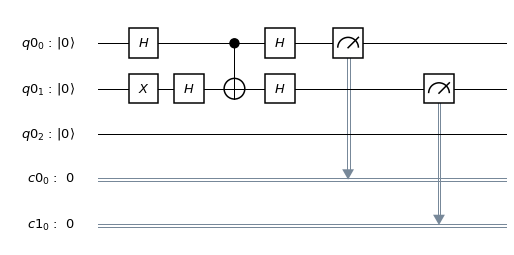

In [4]:
qc.draw(output='mpl')

In [5]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

/home/cleoner/.local/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a backend.
  DeprecationWarning)


Job Status: job has successfully run


In [ ]:
result_exp = job_exp.result()
print(result_exp)

In [ ]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

In [ ]:
#job_get=backend.retrieve_job(jobID)
#job_get.result().get_counts(qc)

In [58]:
api = IBMQuantumExperience(token)
api.get_my_credits()

{'maxUserType': 15, 'promotional': 0, 'remaining': 15}

In [7]:
#api.get_last_codes()

In [8]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q3[3];
creg c0[1];
creg c1[1];
h q3[0];
x q3[1];
h q3[1];
cx q3[0],q3[1];
h q3[0];
h q3[1];
measure q3[0] -> c0[0];
measure q3[1] -> c1[0];

